In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import gc
from tqdm import tqdm
from warnings import filterwarnings
filterwarnings('ignore')


import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

PATH = '../'
RND_SEED = 44

In [93]:
%%time
train = pd.read_csv(PATH + 'train.csv')
test = pd.read_csv(PATH + 'Track 1/test.csv')
submission = pd.read_csv(PATH + 'Track 1/submission.csv')

Wall time: 22.7 s


In [94]:
def smape(satellite_predicted_values, satellite_true_values): 
    # the division, addition and subtraction are pointwise 
    return np.mean(np.abs(satellite_predicted_values - satellite_true_values) / (np.abs(satellite_predicted_values) + np.abs(satellite_true_values)))

In [95]:
shiftedSat = [0,
 1,
 2,
 3,
 4,
 7,
 10,
 12,
 13,
 15,
 17,
 18,
 19,
 21,
 23,
 25,
 27,
 32,
 33,
 37,
 38,
 41,
 45,
 48,
 50,
 52,
 59,
 62,
 63,
 65,
 66,
 70,
 73,
 80,
 82,
 84,
 85,
 86,
 88,
 89,
 90,
 92,
 94,
 98,
 99,
 100,
 101,
 109,
 112,
 118,
 123,
 124,
 125,
 126,
 127,
 133,
 134,
 136,
 141,
 149,
 150,
 151,
 155,
 166,
 167,
 173,
 174,
 175,
 177,
 184,
 186,
 188,
 190,
 195,
 202,
 204,
 206,
 208,
 209,
 213,
 217,
 223,
 230,
 236,
 241,
 242,
 243,
 244,
 246,
 247,
 248,
 249,
 251,
 255,
 256,
 257,
 258,
 264,
 266,
 270,
 272,
 274,
 275,
 278,
 280,
 282,
 283,
 286,
 290,
 291,
 308,
 315,
 318,
 320,
 323,
 325,
 328,
 329,
 334,
 340,
 348,
 351,
 361,
 363,
 364,
 365,
 366,
 368,
 371,
 372,
 375,
 376,
 380,
 381,
 382,
 385,
 390,
 392,
 406,
 407,
 409,
 412,
 415,
 416,
 418,
 420,
 421,
 422,
 429,
 437,
 439,
 440,
 441,
 450,
 451,
 452,
 454,
 461,
 464,
 468,
 470,
 472,
 473,
 476,
 477,
 478,
 480,
 482,
 483,
 486,
 490,
 491,
 493,
 494,
 495,
 498,
 500,
 501,
 502,
 503,
 505,
 508,
 509,
 511,
 512,
 514,
 518,
 521,
 523,
 527,
 529,
 530,
 531,
 533,
 535,
 536,
 538,
 539,
 541,
 542,
 546,
 548,
 549,
 550,
 552,
 555,
 558,
 559,
 560,
 565,
 568,
 569,
 575,
 576,
 577,
 580,
 581,
 584,
 585,
 587,
 588,
 590,
 592,
 595,
 596,
 597,
 598]

In [96]:
linearSat = [5,
 6,
 8,
 9,
 11,
 14,
 20,
 22,
 24,
 26,
 28,
 29,
 30,
 31,
 34,
 35,
 36,
 39,
 40,
 42,
 43,
 44,
 46,
 47,
 49,
 51,
 53,
 54,
 55,
 57,
 58,
 60,
 61,
 64,
 67,
 68,
 69,
 71,
 72,
 74,
 75,
 76,
 79,
 81,
 83,
 91,
 93,
 97,
 102,
 103,
 104,
 106,
 107,
 108,
 111,
 113,
 114,
 115,
 116,
 119,
 120,
 121,
 122,
 128,
 129,
 130,
 131,
 132,
 135,
 137,
 138,
 139,
 140,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 152,
 154,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 168,
 170,
 171,
 172,
 176,
 179,
 180,
 183,
 187,
 191,
 193,
 196,
 198,
 200,
 203,
 207,
 210,
 211,
 212,
 214,
 215,
 216,
 218,
 220,
 221,
 222,
 224,
 225,
 226,
 227,
 229,
 231,
 232,
 233,
 234,
 235,
 237,
 238,
 239,
 240,
 245,
 250,
 252,
 253,
 254,
 259,
 260,
 261,
 262,
 263,
 265,
 268,
 271,
 273,
 276,
 277,
 279,
 281,
 284,
 285,
 287,
 289,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 305,
 306,
 307,
 309,
 310,
 311,
 312,
 313,
 314,
 316,
 317,
 319,
 321,
 322,
 324,
 326,
 330,
 331,
 332,
 333,
 335,
 337,
 339,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 350,
 352,
 353,
 355,
 356,
 358,
 360,
 362,
 367,
 369,
 370,
 373,
 374,
 377,
 378,
 379,
 383,
 384,
 386,
 387,
 388,
 389,
 391,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 403,
 404,
 405,
 408,
 410,
 411,
 413,
 414,
 417,
 419,
 423,
 424,
 425,
 426,
 428,
 430,
 431,
 432,
 433,
 435,
 436,
 438,
 442,
 443,
 444,
 446,
 447,
 448,
 455,
 456,
 458,
 459,
 460,
 462,
 463,
 465,
 466,
 467,
 469,
 471,
 474,
 479,
 485,
 487,
 488,
 489,
 492,
 496,
 499,
 504,
 507,
 510,
 515,
 516,
 517,
 519,
 520,
 522,
 524,
 525,
 526,
 528,
 532,
 534,
 537,
 540,
 543,
 544,
 545,
 547,
 553,
 556,
 557,
 562,
 563,
 564,
 566,
 567,
 570,
 571,
 572,
 573,
 574,
 578,
 579,
 582,
 583,
 586,
 589,
 591,
 593,
 594,
 599]

In [103]:
SAT_ID = -1
while SAT_ID not in shiftedSat:
    SAT_ID = ID = np.random.choice(train['sat_id'].unique(), 1)[0]
training_columns = ['sat_id', 'x_sim', 'y_sim', 'z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim']
prediction_columns = ['x','y','z','Vx', 'Vy', 'Vz']
X = train.loc[:, training_columns]
y = train.loc[:, prediction_columns]
Xtest = test.loc[:, training_columns]

satX = X[X['sat_id'] == SAT_ID].drop(columns = 'sat_id')
satY = y[X['sat_id'] == SAT_ID]
satXTest = Xtest[Xtest['sat_id'] == SAT_ID].drop(columns = 'sat_id')

print(f'ID: {SAT_ID}, Total observations: {satX.shape[0]}; In test {satXTest.shape[0]}')

ID: 482, Total observations: 1000; In test 901


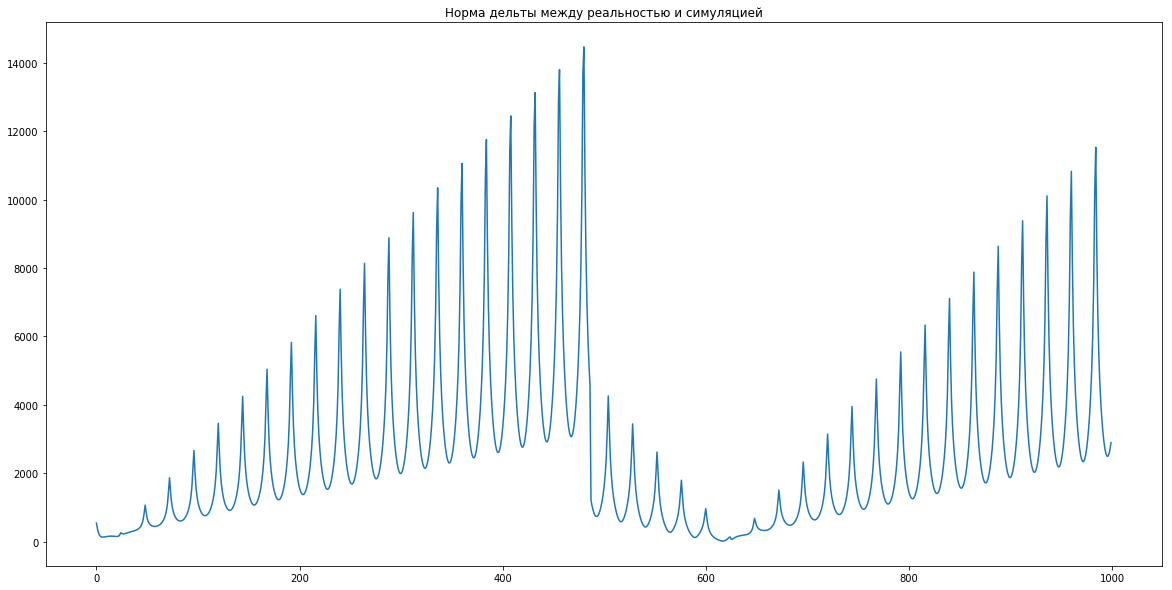

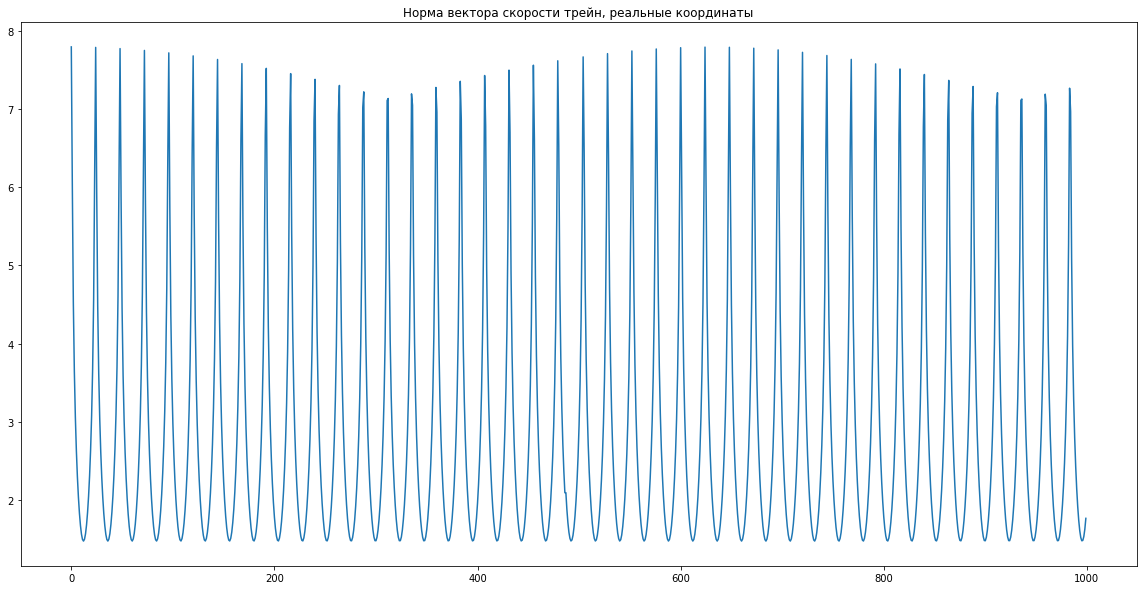

In [104]:
# Зависимость скорости и симулированной скорости от времени

x,y,z = satY.loc[:, 'Vx'].values, satY.loc[:, 'Vy'].values, satY.loc[:, 'Vz'].values
xSim,ySim,zSim = satX.loc[:, 'Vx_sim'].values, satX.loc[:, 'Vy_sim'].values, satX.loc[:, 'Vz_sim'].values

xTestSim, yTestSim, zTestSim = satXTest.loc[:, 'Vx_sim'].values, satXTest.loc[:, 'Vy_sim'].values, satXTest.loc[:, 'Vz_sim'].values
fig1 = go.Scatter3d(x=x, 
                    y=y, 
                    z=z, 
                    mode='markers', 
                    marker=dict(
                        #color='rgb(127, 127, 127)',
                        color = np.arange(satX.shape[0]),
                        colorscale = 'Viridis',
                        showscale = True,
                        size=8, 
                        symbol='circle', 
                        line=dict(
                            color='rgb(204, 204, 204)',
                            width=0.5),
                        opacity=0.9),
                   name = 'Real')
fig2 = go.Scatter3d(x=xSim, 
                    y=ySim, 
                    z=zSim, 
                    mode = 'markers', 
                    marker=dict(
                        size=8,
                        line=dict(
                            color='rgba(217, 217, 217, 0.14)',
                            width=0.5
                        ),
                    opacity=0.8),
                    name = 'Simulated')

fig3 = go.Scatter3d(x=xTestSim, 
                    y=yTestSim, 
                    z=zTestSim, 
                    mode = 'markers', 
                    marker=dict(
                        size=8,
                        line=dict(
                            color='rgba(255, 87, 123, 0.05)',
                            width=0.5
                        ),
                    opacity=0.8),
                    name = 'SimulatedTest')
fig = go.Figure(data = [fig1, fig2, fig3])
fig.show()


SAT_ID = ID
satDataTrain = train[train['sat_id'] == SAT_ID].loc[:, ['x', 'y', 'z']]
satDataTrainSim = train[train['sat_id'] == SAT_ID].loc[:, ['x_sim', 'y_sim', 'z_sim']]
#satDataTest = test[test['sat_id'] == SAT_ID].iloc[:, 3:6]
plt.figure(figsize = (20,10))
plt.title('Норма дельты между реальностью и симуляцией')
plt.plot(np.linalg.norm(satDataTrain.values - satDataTrainSim.values, axis = 1))
plt.show()

SAT_ID = ID
satDataTrain = train[train['sat_id'] == SAT_ID].loc[:, ['Vx', 'Vy', 'Vz']]
#satDataTest = test[test['sat_id'] == SAT_ID].iloc[:, 3:6]
plt.figure(figsize = (20,10))
plt.title('Норма вектора скорости трейн, реальные координаты')
plt.plot(np.linalg.norm(satDataTrain, axis = 1))

In [105]:
# Разобъем на кластеры по x_sim, y_sim, z_sim, кластеров всегда будет 24 (империческое наблюдение так сказать)

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
model = KMeans(n_clusters=24, tol = 1e-3, algorithm = 'elkan', random_state=RND_SEED)
#model = DBSCAN(eps = 1000)
labels = model.fit_predict(satX[['x_sim', 'y_sim', 'z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim']])
print('Num unique labels: ', len(np.unique(labels)))

Num unique labels:  24


In [106]:
# Отобразим все x,y,z, xsim, ysim, zsim, относящиеся к одному кластеру
CLUSTER = 2
CLUSTER2 = 2
CLUSTER3 = 2
CLUSTER4 = 2
clusterDataTrainX = satX[(labels == CLUSTER) | (labels == CLUSTER2) | (labels == CLUSTER3) | (labels == CLUSTER4)]
clusterDataTrainY = satY[(labels == CLUSTER) | (labels == CLUSTER2) | (labels == CLUSTER3) | (labels == CLUSTER4)]
 
testLabels = model.predict(satXTest[['x_sim', 'y_sim', 'z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim']])
clusterDataTest = satXTest[(testLabels == CLUSTER)| (testLabels == CLUSTER2) | (testLabels == CLUSTER3) | (testLabels == CLUSTER4)]


# Зависимость координат и симулированных координат от времени

x,y,z = clusterDataTrainY.loc[:, 'x'].values, clusterDataTrainY.loc[:, 'y'].values, clusterDataTrainY.loc[:, 'z'].values
xSim,ySim,zSim = clusterDataTrainX.loc[:, 'x_sim'].values, clusterDataTrainX.loc[:, 'y_sim'].values, clusterDataTrainX.loc[:, 'z_sim'].values

xTestSim, yTestSim, zTestSim = clusterDataTest.loc[:, 'x_sim'].values, clusterDataTest.loc[:, 'y_sim'].values, clusterDataTest.loc[:, 'z_sim'].values
fig1 = go.Scatter3d(x=x, 
                    y=y, 
                    z=z, 
                    mode='markers', 
                    marker=dict(
                        #color='rgb(127, 127, 127)',
                        color = np.arange(clusterDataTrainX.shape[0]),
                        colorscale = 'Viridis',
                        showscale = True,
                        size=8, 
                        symbol='circle', 
                        line=dict(
                            color='rgb(204, 204, 204)',
                            width=0.5),
                        opacity=0.9),
                   name = 'Real')
fig2 = go.Scatter3d(x=xSim, 
                    y=ySim, 
                    z=zSim, 
                    mode = 'markers', 
                    marker=dict(
                        size=8,
                        line=dict(
                            color='rgba(217, 217, 217, 0.14)',
                            width=0.5
                        ),
                    opacity=0.8),
                    name = 'Simulated')

fig3 = go.Scatter3d(x=xTestSim, 
                    y=yTestSim, 
                    z=zTestSim, 
                    mode = 'markers', 
                    marker=dict(
                        size=8,
                        line=dict(
                            color='rgba(255, 87, 123, 0.05)',
                            width=0.5
                        ),
                    opacity=0.8),
                    name = 'SimulatedTest')
fig = go.Figure(data = [fig1, fig2, fig3])
fig.show()

#--------------------------------------------------------------
from sklearn.linear_model import LinearRegression
trainSize = 0.8
nTargets = 6
smp = []
model = LinearRegression()
size = int(satX.shape[0] * trainSize)
Xtr, Xval = satX.iloc[:size, :], satX.iloc[size:, :]
ytr, yval = satY.iloc[:size, :], satY.iloc[size:, :]
for i in range(nTargets):
    model.fit(Xtr, ytr.iloc[:, i])
    ypred = model.predict(Xval)
    smp.append(smape(ypred, yval.iloc[:, i]))
print('Simple LB Score', 100*(1 - np.mean(smp)))

#--------------------------------------------------------------
cluster = KMeans(n_clusters=24, tol = 1e-3, algorithm = 'elkan', random_state=RND_SEED)
labelsTrain = cluster.fit_predict(Xtr)
labelsTest = cluster.predict(Xval)
smp = []
for label in np.unique(labelsTest):
    for i in range(nTargets):
        model.fit(Xtr[labelsTrain == label], ytr[labelsTrain == label].iloc[:, i])
        ypred = model.predict(Xval[labelsTest == label])
        smp.append(smape(ypred, yval[labelsTest == label].iloc[:, i]))
print('Cluster dependent LB Score', 100*(1 - np.mean(smp)))
#--------------------------------------------------------------
cluster = KMeans(n_clusters=24, tol = 1e-3, algorithm = 'elkan', random_state=RND_SEED)
labelsTrain = cluster.fit_predict(Xtr)
labelsTest = cluster.predict(Xval)
smp = []
for label in np.unique(labelsTest):
    for i in range(nTargets):
        model.fit(Xtr[labelsTrain == label], ytr[labelsTrain == label].iloc[:, i])
        ypred = ytr[labelsTrain == label].iloc[-1, i]
        smp.append(smape(ypred, yval[labelsTest == label].iloc[:, i]))
print('Cluster dependent on shift LB Score', 100*(1 - np.mean(smp)))



Simple LB Score 89.17228139041529
Cluster dependent LB Score 71.37797469107554
Cluster dependent on shift LB Score 92.01610806787764
